In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
a=np.array([[0, 1, 2], [3,4,5],[6, 7, 8]])
print(a)
# print(a.shape)
b=a[ : ,0:2]
c=a[0:2, 1]
print(c)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[1 4]


In [2]:
pwd

'c:\\Users\\Sahil Khan\\Desktop\\MUN Data Science 2024-25\\DSCI-6601-001 Pract Machine Learning 41417'

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/Advertising.csv')

# Print the first few rows of the dataset
print(data.head(10))



   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6


In [4]:
data=data.drop(columns=['Unnamed: 0'])
print(data.head(10))


      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6


In [5]:
rows, columns = data.shape

# Print the number of rows and columns
print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 200
Number of columns: 4


In [6]:
# Set all columns except the last as X and the last as Y
X = data.iloc[:, :-1]  # Select all columns except the last
y = data.iloc[:, -1]   # Select the last column


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'data' is your DataFrame and is already imported

# Number of iterations
num_iterations = 20  # You can adjust this as needed

# Lists to store results for computing statistics
mse_scores = []
r2_scores = []

for i in range(num_iterations):
    # Randomly select 40 rows
    sample = data.sample(120)
    X = sample.iloc[:, :-1]  # Select all columns except the last
    y = sample.iloc[:, -1]   # Select the last column

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= np.random.randint(10000))

    # Model training
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Collecting the metrics
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Iteration {i+1}:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("---------------------------------------")

# Computing average and standard deviation
average_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
average_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Average Mean Squared Error:", average_mse)
print("Standard Deviation of MSE:", std_mse)
print("Average R-squared:", average_r2)
print("Standard Deviation of R2:", std_r2)


Iteration 1:
Mean Squared Error: 1.530833333333333
R-squared: 0.9533503758380172
---------------------------------------
Iteration 2:
Mean Squared Error: 1.6070833333333343
R-squared: 0.9501151090302388
---------------------------------------
Iteration 3:
Mean Squared Error: 2.5145833333333343
R-squared: 0.9208778818609102
---------------------------------------
Iteration 4:
Mean Squared Error: 6.3425
R-squared: 0.8369211210467674
---------------------------------------
Iteration 5:
Mean Squared Error: 2.488333333333333
R-squared: 0.8834197144056299
---------------------------------------
Iteration 6:
Mean Squared Error: 2.2475
R-squared: 0.9223637275198084
---------------------------------------
Iteration 7:
Mean Squared Error: 1.8025000000000009
R-squared: 0.9374502594491232
---------------------------------------
Iteration 8:
Mean Squared Error: 0.4687500000000003
R-squared: 0.9658396920005414
---------------------------------------
Iteration 9:
Mean Squared Error: 2.624166666666667

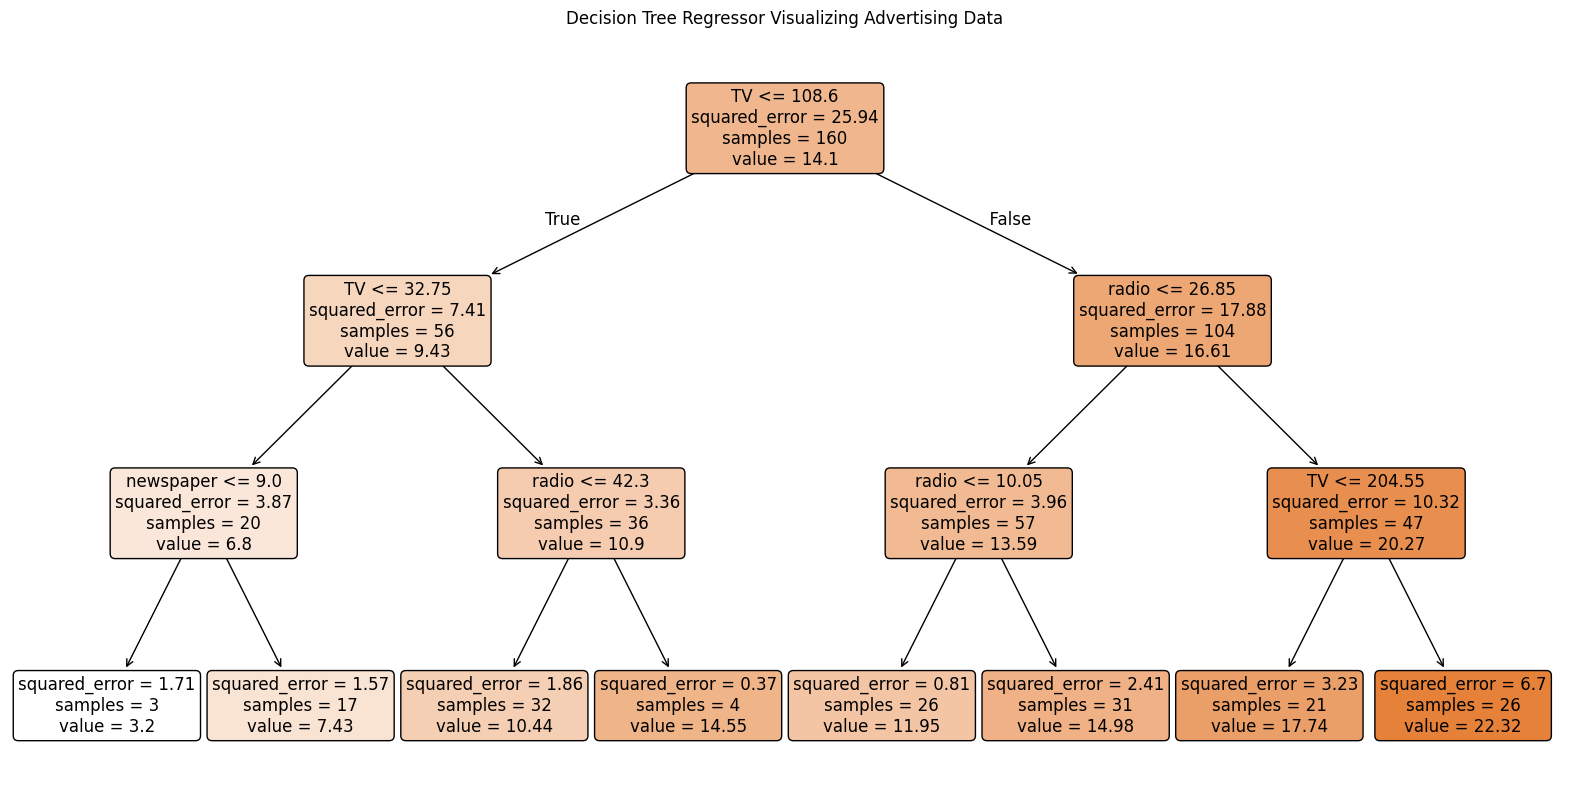

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/My Drive/data_code_DSCI6601/data/Advertising.csv')



# Features and target variable
X = data[['TV', 'radio', 'newspaper']]  # Features
y = data['sales']                       # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model with limited depth to make it easier to understand
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
tree_plot = plot_tree(model, filled=True, feature_names=X.columns, rounded=True, precision=2, fontsize=12)
plt.title("Decision Tree Regressor Visualizing Advertising Data")
plt.show()
